# Hello World
Some Document About Code

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print('hello world')

hello world


In [6]:
with open("goemotions.json") as f:
    data = json.load(f)

['sadness' 'neutral' 'love' ... 'caring' 'admiration' 'anger']
['negative' 'neutral' 'positive' ... 'positive' 'positive' 'negative']


<AxesSubplot: >

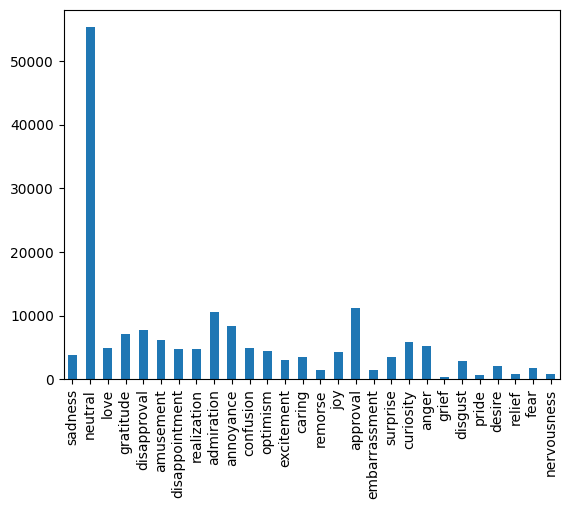

In [7]:
bignumpy = np.asarray(data)
allemotions = bignumpy[:,1]
print(allemotions)
allsentiment = bignumpy[:,2]
print(allsentiment)
# print(bignumpy)

everyemotions = np.unique(allemotions)
# print (everyemotions)

howmanyemotions = len(everyemotions)
# print(howmanyemotions)
iterationemotions = []
#np.unique(my_array, return_counts=True)
for x in everyemotions:
    number = np.count_nonzero(allemotions == x)
    iterationemotions.append(number) 
#print(iterationemotions)



pd1 = pd.Series(allemotions).value_counts(sort=False).plot(kind='bar')
display(pd1)
#plt.xticks(rotation='vertical')
#plt.hist(everyemotions, weights=iterationemotions, edgecolor='black')



<AxesSubplot: >

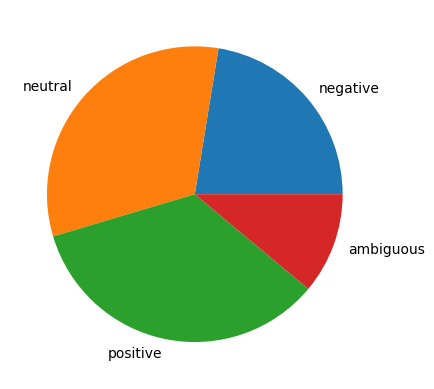

In [8]:
pd2 = pd.Series(allsentiment).value_counts(sort=False).plot(kind='pie')
display(pd2)
